### Univariate Distribution of Features

In this notebook we examine the distribution of each feature one-by-one. The final section of the notebook contains some general observation and takeaways, with preliminary recommendations for data cleaning and feature selection.

#### Load and Examine the Data

In [2]:
# Import libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
# Read in data, examine first few rows
df = pd.read_csv("../data/train_set.csv")
pd.set_option('display.max_columns', None)
df.head(5)

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,vent_hist,renal_issue,pulm_severe,prim_disease_hct,hla_high_res_6,cmv_status,hla_high_res_10,hla_match_dqb1_high,tce_imm_match,hla_nmdp_6,hla_match_c_low,rituximab,hla_match_drb1_low,hla_match_dqb1_low,prod_type,cyto_score_detail,conditioning_intensity,ethnicity,year_hct,obesity,mrd_hct,in_vivo_tcd,tce_match,hla_match_a_high,hepatic_severe,donor_age,prior_tumor,hla_match_b_low,peptic_ulcer,age_at_hct,hla_match_a_low,gvhd_proph,rheum_issue,sex_match,hla_match_b_high,race_group,comorbidity_score,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,16466,Intermediate,No,Poor,No,1.0,4.0,TBI + Cy +- Other,No,4.0,Peripheral blood,No,No,No,IPA,3.0,+/-,NaN,NaN,NaN,4.0,1.0,No,1.0,2.0,PB,Poor,RIC,Not Hispanic or Latino,2013,No,NaN,Yes,NaN,1.0,No,47.501,No,1.0,NaN,52.107,2.0,FK+ MMF +- others,No,F-M,1.0,American Indian or Alaska Native,0.0,90.0,No,NaN,Related,"N/A, Mel not given",5.0,No,1.0,No,7.0,0.0,93.779
1,4038,Intermediate,No,Poor,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,No,No,No,ALL,6.0,-/+,10.0,2.0,P/P,6.0,2.0,NaN,2.0,2.0,PB,Intermediate,No drugs reported,Not Hispanic or Latino,2018,Yes,Positive,No,NaN,2.0,No,24.692,No,2.0,NaN,50.588,2.0,FK+ MMF +- others,NaN,M-F,2.0,Asian,2.0,60.0,No,NaN,Unrelated,MEL,8.0,No,2.0,No,10.0,1.0,12.088
2,7006,High,Yes,Favorable,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,No,No,No,IPA,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,PB,Intermediate,RIC,Not Hispanic or Latino,2018,No,NaN,No,Permissive,2.0,No,19.362,No,2.0,No,64.760,2.0,FK+ MMF +- others,No,M-M,2.0,Native Hawaiian or other Pacific Islander,4.0,90.0,No,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,0.0,25.724
3,9798,High - TED AML case <missing cytogenetics,No,Poor,Yes,2.0,8.0,No TBI,No,6.0,Peripheral blood,No,No,No,ALL,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,PB,NaN,MAC,Not Hispanic or Latino,2016,Yes,Positive,Yes,Permissive,2.0,No,28.968,No,2.0,No,0.044,2.0,FK+ MMF +- others,No,M-F,2.0,American Indian or Alaska Native,0.0,90.0,No,Permissive mismatched,Unrelated,MEL,8.0,No,2.0,No,10.0,0.0,43.373
4,14496,TBD cytogenetics,No,NaN,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,ALL,6.0,+/-,10.0,2.0,NaN,6.0,2.0,No,2.0,2.0,BM,NaN,MAC,Not Hispanic or Latino,2017,No,Negative,Yes,Permissive,2.0,No,22.974,No,2.0,No,4.146,2.0,FK+ MTX +- others(not MMF),No,F-F,2.0,More than one race,0.0,80.0,No,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,1.0,8.593


In [4]:
print("The training data set has {} rows and {} columns".format(df.shape[0], df.shape[1]))

The training data set has 23040 rows and 60 columns


##### Check for Missing Values

In [5]:
# Check the percent of values in ech column that are missing. 
# We see that there are eight features with 20% or more missing values,
# and two features with over 50% missing values.
# The two column which encode our target (efs and efs_time)
# have no missing values.

pd.DataFrame(df.isna().sum()/df.shape[0] * 100).reset_index() \
    .rename(columns={"index":"Feature", 0:"Percent Missing"}) \
    .sort_values(by="Percent Missing", ascending=False)

,Feature,Percent Missing
33,tce_match,66.032986
31,mrd_hct,57.773438
26,cyto_score_detail,41.362847
50,tce_div_match,39.648438
19,tce_imm_match,38.715278
3,cyto_score,27.877604
17,hla_high_res_10,24.822049
6,hla_high_res_8,20.121528
15,hla_high_res_6,18.255208
18,hla_match_dqb1_high,17.999132


In [6]:
# For now, we will keep all rows and columns--even those with missing data.
# We drop the ID column, which does not contain information useful for modeling.
# We also replace the numerical values in the efs column
# with text values, which are easier to interpret.

df = df.drop("ID", axis=1)
df['efs'] = df['efs'].replace({0:"Censored", 1:"Event"})

##### Basic Descriptive Statistics for Numeric Columns

In [7]:
# Check which datatypes exist in the data.
# We have dtype 'O' (for 'object', pandas categorical datatype)
# as well as integer and floating-point datatypes.
# We will confirm that the datatype for each column makes sense
# when we examine the columns individually.
df.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [8]:
# Compute basic descriptive statistics for numerical variables.
# It appears that many of these features take just a few 
# integer values. 

df_numeric = df.select_dtypes(['float64', 'int64'])
df_numeric.describe()

,hla_match_c_high,hla_high_res_8,hla_low_res_6,hla_high_res_6,hla_high_res_10,hla_match_dqb1_high,hla_nmdp_6,hla_match_c_low,hla_match_drb1_low,hla_match_dqb1_low,year_hct,hla_match_a_high,donor_age,hla_match_b_low,age_at_hct,hla_match_a_low,hla_match_b_high,comorbidity_score,karnofsky_score,hla_low_res_8,hla_match_drb1_high,hla_low_res_10,efs_time
count,19370.000000,18404.000000,20462.000000,18834.000000,17321.000000,18893.000000,19699.000000,20842.000000,20972.000000,19703.000000,23040.000000,19607.000000,21585.000000,21024.000000,23040.000000,21154.000000,19803.000000,22669.000000,22334.000000,20165.000000,20373.000000,19006.000000,23040.000000
mean,1.762881,6.871332,5.142997,5.106510,8.611858,1.737892,5.160160,1.757029,1.715716,1.774045,2015.172960,1.702096,42.556565,1.718655,38.779607,1.708849,1.698329,1.706824,83.862721,6.902951,1.707260,8.663369,23.248850
std,0.433384,1.569407,1.208275,1.217109,1.910823,0.447547,1.204193,0.435549,0.451083,0.427226,3.149926,0.463001,15.265324,0.455238,21.132123,0.458447,0.465766,1.999752,11.005230,1.566598,0.460713,1.885659,24.840521
min,0.000000,2.000000,2.000000,0.000000,3.000000,0.000000,2.000000,0.000000,1.000000,0.000000,2008.000000,0.000000,18.010000,0.000000,0.044000,0.000000,0.000000,0.000000,40.000000,2.000000,0.000000,4.000000,0.333000
25%,2.000000,6.000000,4.000000,4.000000,7.000000,1.000000,4.000000,2.000000,1.000000,2.000000,2013.000000,1.000000,28.482000,1.000000,19.779250,1.000000,1.000000,0.000000,70.000000,6.000000,1.000000,7.000000,5.600000
50%,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,2.000000,2016.000000,2.000000,40.115000,2.000000,41.141000,2.000000,2.000000,1.000000,90.000000,8.000000,2.000000,10.000000,9.755500
75%,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,2.000000,2018.000000,2.000000,56.230000,2.000000,56.074250,2.000000,2.000000,2.000000,90.000000,8.000000,2.000000,10.000000,35.200250
max,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,2.000000,2020.000000,2.000000,84.800000,2.000000,73.670000,2.000000,2.000000,10.000000,100.000000,8.000000,2.000000,10.000000,156.819000


#### Define Helper Functions to Summarize and Plot Features

In [9]:
# Function that takes the name of a discrete feature
# and produces a barplot of the number of 
# cases for each value of the feature.
# May be used for either categorical features
# or integer features which only take a
# few distinct values.

def plot_discrete_feature(feat_name, df=df, tick_angle = 0, figsize=(5, 3)):
    fig, ax = plt.subplots(figsize=figsize)
    cat_order = None
    if df[feat_name].dtype == 'O':
        cat_order = df[feat_name].value_counts().index.to_list()
    sns.countplot(df, x = feat_name, order=cat_order)
    plt.xlabel(feat_name)
    plt.ylabel("Number of cases ")
    plt.title("Number of cases by {}".format(feat_name))
    ax.tick_params(axis='x', rotation=tick_angle)
    plt.show()

In [10]:
# Function the takes the name of a discrete feature
# and returns a dataframe with the percentage
# of cases that take on each level of the feature.
# Note that this ignores any cases where the
# value of the feature is missing.

def get_percentages(feat_name, df=df):
    percentages = df[feat_name].value_counts()/df[feat_name].count() * 100
    formatted = round(pd.DataFrame(percentages).reset_index(), 2) \
         .rename(columns={"count":"percent"}) 
    
    if df[feat_name].dtype == 'O':
        formatted = formatted.sort_values(by="percent", ascending=False)
    else:
        formatted = formatted.sort_values(by = feat_name)
        
    return formatted

In [11]:
# Function that takes the name of a numeric feature
# and produces a figure with two subplots:
# a boxplot of the feature, and a histogram.
# Boxplots are often useful for detecting outliers,
# while histograms give more insight into the
# overall shape of a distribution.

def plot_numeric_feature(feat_name, data = df, bins=10, kde=True, discrete=False):
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    fig.suptitle("Distribution of {}".format(feat_name))
    sns.boxplot(data = df, y=feat_name, ax=ax[0])
    sns.histplot(data = df, x=feat_name, ax=ax[1], kde=kde, bins=bins, discrete=discrete)
    plt.subplots_adjust(wspace=0.4)
    ax[1].set_ylabel("Number of cases")
    plt.show()

In [12]:
# While this notebook is mostly for univariate analysis,
# I am including a function here which plots efs_time (survival time)
# broken down by efs (event/censored).
# These two variables can be viewed as jointly encoding
# our true modeling objective (survival time).

def plot_efs_vs_efs_time(bins=10):
    fig, ax = plt.subplots(1, 2, figsize=(12, 3))
    fig.suptitle("Distribution of efs_time by efs")
    sns.boxplot(data = df, y="efs_time", x = "efs", hue="efs", ax=ax[0])
    sns.histplot(data = df, x="efs_time", hue="efs", ax=ax[1], multiple='stack', bins=bins)
    plt.subplots_adjust(wspace=0.3)
    ax[0].legend([], [], frameon=False)
    ax[0].set_ylabel("")
    ax[1].set_ylabel("Number of cases")
    plt.show()

#### Univariate Distributions of Features

##### Distribution of dri_score

In [13]:
# View percentage of cases by value of dri_score
get_percentages('dri_score')

,dri_score,percent
0,Intermediate,36.41
1,High,16.60
2,N/A - pediatric,16.60
3,N/A - non-malignant indication,8.56
4,TBD cytogenetics,6.96
5,Low,6.69
6,High - TED AML case <missing cytogenetics,4.85
7,Intermediate - TED AML case <missing cytogenetics,1.65
8,N/A - disease not classifiable,0.96
9,Very high,0.69


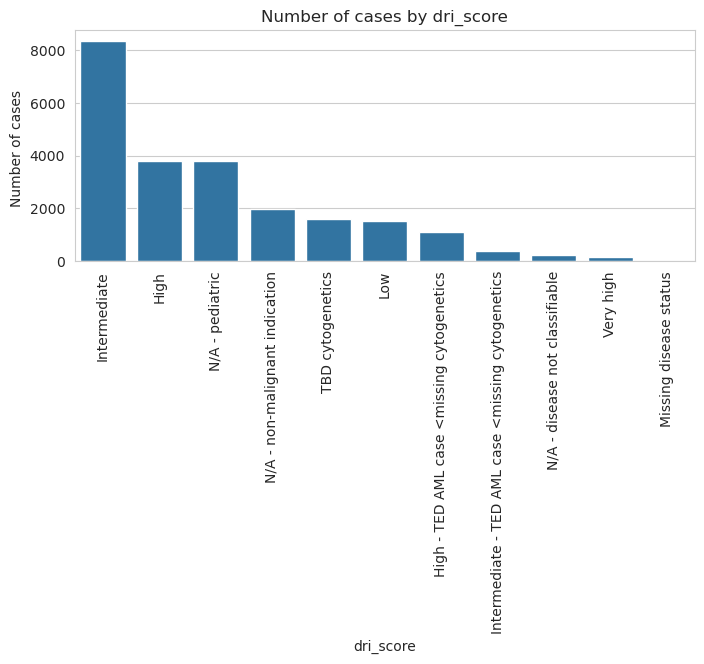

In [14]:
# Plot number of cases by value of dri_score
plot_discrete_feature('dri_score', tick_angle=90, figsize=(8, 3))

**Notes:** This feature represents a categorical disease risk index. This is a relatively high cardinality feature, with 11 levels. Of these, 5 levels are relatively rare, representing 5% of less of cases each. For simplicity, we may want to combine some levels. For example, `High - TED AML case <missing cytogenetics` could be binned with `High`. Some of these levels seem to represent missing data: `TDB cytogenetics` and `Missing Disease Status` could be coded as missing data.

##### Distribution of psych_disturb

In [15]:
# View percentage of cases by value of psych_disturb
get_percentages('psych_disturb')

,psych_disturb,percent
0,No,86.03
1,Yes,13.46
2,Not done,0.51


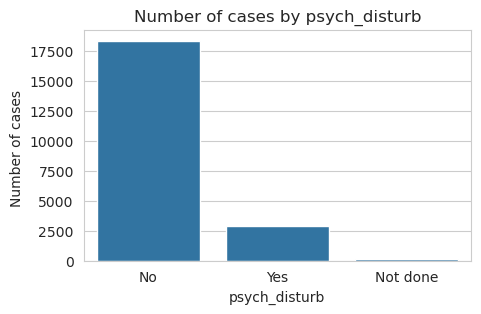

In [16]:
# Plot number of cases by value of psych_disturb
plot_discrete_feature('psych_disturb')

**Notes:** The value of `psych_disturb` is `Yes` in about 13% of cases where this feature is present. This is relatively rare, but potentially still worth considering. We may want to code the rare value `Not done` as missing data.

##### Distribution of cyto_score

In [17]:
# View percentage of cases by value of cyto_score
get_percentages('cyto_score')

,cyto_score,percent
0,Poor,42.63
1,Intermediate,30.58
2,Favorable,14.47
3,TBD,6.48
4,Normal,3.12
5,Other,2.46
6,Not tested,0.27


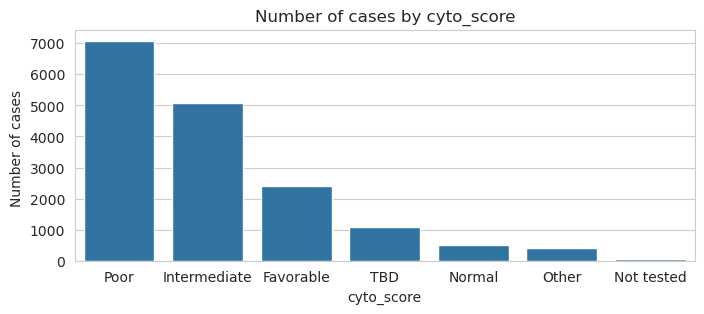

In [18]:
# Plot number of cases by value of cyto_score
plot_discrete_feature('cyto_score', figsize=(8, 3))

**Notes:** This categorical variable encodes the level of abnormality observed while analyzing a patient's bone-marror cells. We may wish to code the values `TBD`, `Other` and `Not tested` as missing data. It's possible that `Normal` should be binned with `Favorable`. Analyzing how these levels correlate with survival times could help show whether this make sense.

##### Distribution of diabetes

In [19]:
# View percentage of cases by value of diabetes
get_percentages('diabetes')

,diabetes,percent
0,No,83.21
1,Yes,16.29
2,Not done,0.50


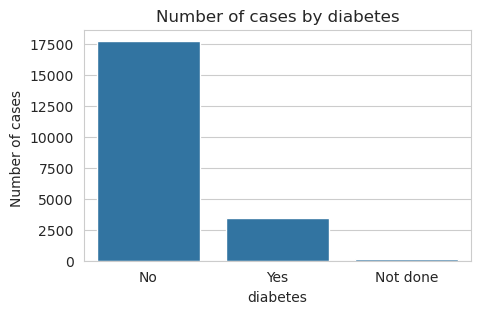

In [20]:
# Plot number of cases by value of diabetes
plot_discrete_feature('diabetes')

**Notes:** For cases where this feature is present, roughly 16% have diabetes. We may wish to thread the `Not done` category as missing data.

##### Distribution of hla_match_c_high

In [21]:
# View percentage of cases by value of hla_match_c_high
get_percentages('hla_match_c_high')

,hla_match_c_high,percent
2,0.0,0.35
1,1.0,23.02
0,2.0,76.63


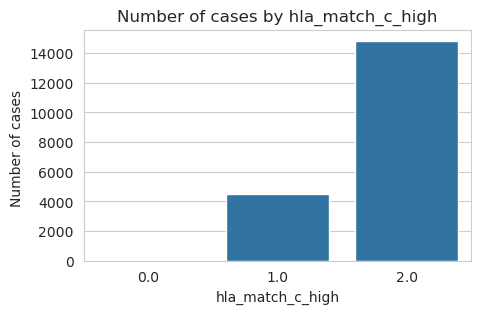

In [22]:
# Plot number of cases by value of hla_match_c_high
plot_discrete_feature('hla_match_c_high')

**Notes:** This feature represents recipient / 1st donor level allel level (high resolution) matching a HLA-C. The fact that less than 0.33% of cases have value `0` is striking. It's possible that donors with a poor match on this allele are usually excluded. We may want to examine these specific cases in more detail--they may be outliers, or unusual in some other way.

##### Distribution of hla_high_res_8

In [23]:
# View percentage of cases by value of hla_high_res_8
get_percentages('hla_high_res_8')

,hla_high_res_8,percent
6,2.0,0.01
5,3.0,0.14
1,4.0,16.75
3,5.0,7.29
4,6.0,6.46
2,7.0,10.31
0,8.0,59.04


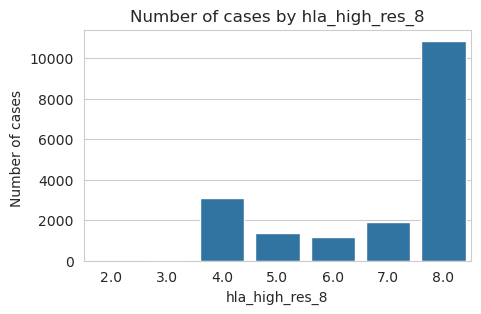

In [24]:
# Plot number of cases by value of hla_high_res_8
plot_discrete_feature('hla_high_res_8')

**Notes:** This feature represents recipient / 1st donor allele-level (high resolution) matching at multiple genetic loci: HLA-A, HLA-B, HLA-C and HLR-DRB1. This takes discrete integer values up to 8. However, we have essentially no values less than 4. The most common value is 8, at almost 60% of cases.

##### Distribution of tbi_status

In [25]:
# View percentage of cases by value of tbi_status
get_percentages('tbi_status')

,tbi_status,percent
0,No TBI,65.34
1,TBI + Cy +- Other,21.31
2,"TBI +- Other, <=cGy",6.10
3,"TBI +- Other, >cGy",5.89
4,"TBI +- Other, -cGy, single",0.46
5,"TBI +- Other, -cGy, fractionated",0.42
6,"TBI +- Other, unknown dose",0.25
7,"TBI +- Other, -cGy, unknown dose",0.24


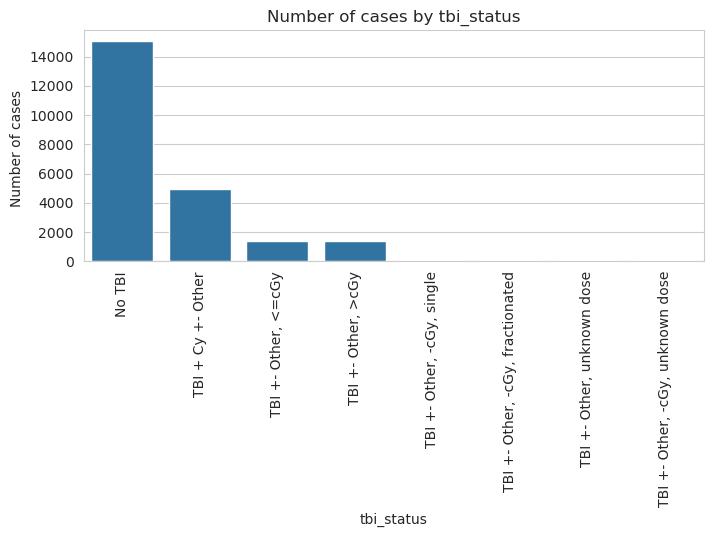

In [26]:
# Plot number of cases by value of tbi_status
plot_discrete_feature('tbi_status', figsize=(8, 3), tick_angle = 90)

**Notes:** Since we are analyzing Leukemia cases, the meaning of `TBI` in this context is likely ["total-body irradiation"](https://www.cancerresearchuk.org/about-cancer/treatment/bone-marrow-stem-cell-transplants/total-body-irradiation-tbi), which is often performed before a bone-marrow or stem-cell transplant.  We will likely need to bin the feature into fewer levels--for example by grouping all except the first two categories together into a single  `Other` category.

##### Distribution of arrhythmia

In [27]:
# View percentage of cases by value of arrhythmia
get_percentages('arrhythmia')

,arrhythmia,percent
0,No,94.64
1,Yes,4.91
2,Not done,0.45


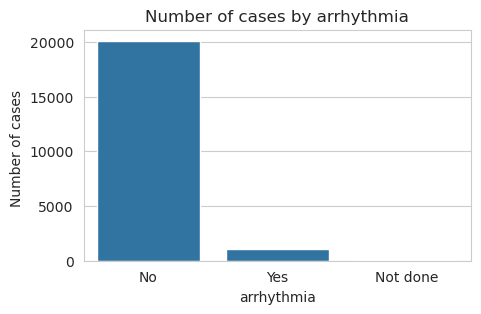

In [28]:
# Plot number of cases by value of arrhythmia
plot_discrete_feature('arrhythmia')

**Notes:** Since the value of arrhythmia is `No` in almost 95% of cases where the feature is present, this feature may not be very useful. Unless it has a very strong relation to the target, this may be one we drop.

##### Distribution of hla_low_res_6

In [29]:
# View percentage of cases by value of hla_low_res_6
get_percentages('hla_low_res_6')

,hla_low_res_6,percent
4,2.0,0.08
1,3.0,19.45
3,4.0,8.03
2,5.0,10.97
0,6.0,61.47


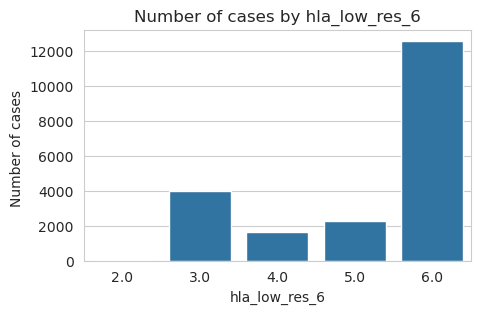

In [30]:
# Plot number of cases by value of hla_low_res_6
plot_discrete_feature('hla_low_res_6')

**Notes:** This feature represents recipient / 1st donor antigen-level (low resolution) matching at HLA-A,-B,-DRB1. Note that this is similar to the definiton of `hla_high_res_8` refers to high-resolution matching and does not include locus HLA-C. Note also that the feature `hla_match_c_high` encodes high-resolution matching on HLA-C. Hence `hla_high_res_6` may be redundant, unless one or both of the other two features are missing.

As in the case of `hla_high_res_8` and `hla_match_c_high`, this feature is equal to the maximum value a majority of the time when it is present. Values below 3 are very rare and may be outliers.

##### Distribution of graft_type

In [31]:
# View percentage of cases by value of graft_type
get_percentages('graft_type')

,graft_type,percent
0,Peripheral blood,71.48
1,Bone marrow,28.52


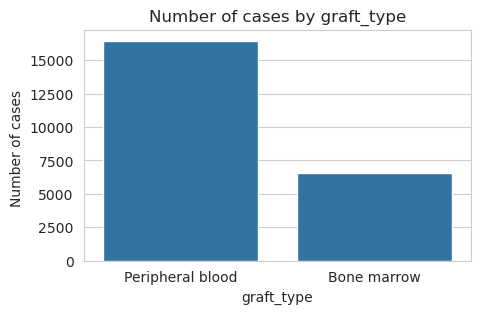

In [32]:
# Plot number of cases by value of graft_type
plot_discrete_feature('graft_type')

**Notes:** This feature has only two values, and both values are reasonable well-respresented in the data.

##### Distribution of vent_hist

In [33]:
# View percentage of cases by value of vent_hist
get_percentages('vent_hist')

,vent_hist,percent
0,No,97.12
1,Yes,2.88


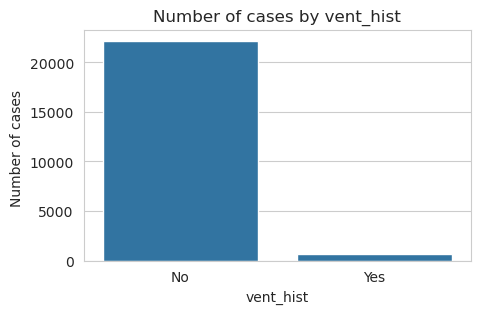

In [34]:
# Plot number of cases by value of vent_hist
plot_discrete_feature('vent_hist')

**Notes:** This feature represents history of mechanical ventilation, and is `Yes` less than 3% of the time. Because mechanical ventilation potentially indicates a serious medical issue, this may be worth exploring further. For example, do we see more `Yes` values during the peak COVID-19 years, indicating that it may be a proxy for severe COVID-19 infection?

##### Distribution of renal_issue

In [35]:
# View percentage of cases by value of renal_issue
get_percentages('renal_issue')

,renal_issue,percent
0,No,98.70
1,Yes,0.77
2,Not done,0.53


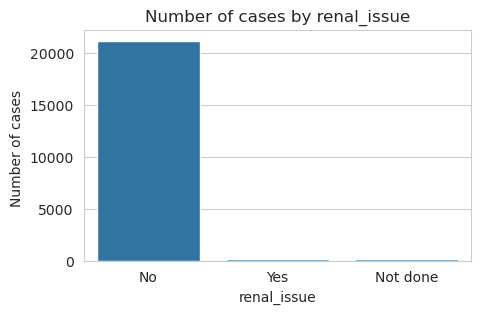

In [36]:
# Plot number of cases by value of renal_issue
plot_discrete_feature('renal_issue')

**Notes:** This feature encodes the presence of moderate to severe kidney issues, with 98% of the values being `No`. Since this is a low-variance feature, it may not be useful for our model. Alternatively, we may want to combine it with other rare health issues such as history of mechanical ventilation. We may wish to code `Not done` as missing data.

##### Distribution of pulm_severe

In [37]:
# View percentage of cases by value of pulm_severe
get_percentages('pulm_severe')

,pulm_severe,percent
0,No,92.99
1,Yes,6.34
2,Not done,0.67


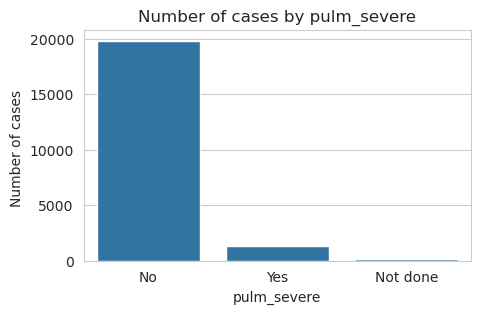

In [38]:
# Plot number of cases by value of pulm_severe
plot_discrete_feature('pulm_severe')

**Notes:** This feature encodes the presence of severe pulmonary issues, with 93% of the values being `No`. Since this is a low-variance feature, it may not be useful for our model. Alternatively, we may want to combine it with other rare health issues such as history of mechanical ventilation. We may wish to code `Not done` as missing data.

##### Distribution of prim_disease_hct

In [39]:
# View percentage of cases by value of prim_disease_hct
get_percentages('prim_disease_hct')

,prim_disease_hct,percent
0,ALL,28.22
1,AML,24.74
2,MDS,10.59
3,IPA,5.97
4,MPN,5.86
5,IEA,5.06
6,NHL,4.60
7,IIS,3.45
8,PCD,2.99
9,SAA,2.46


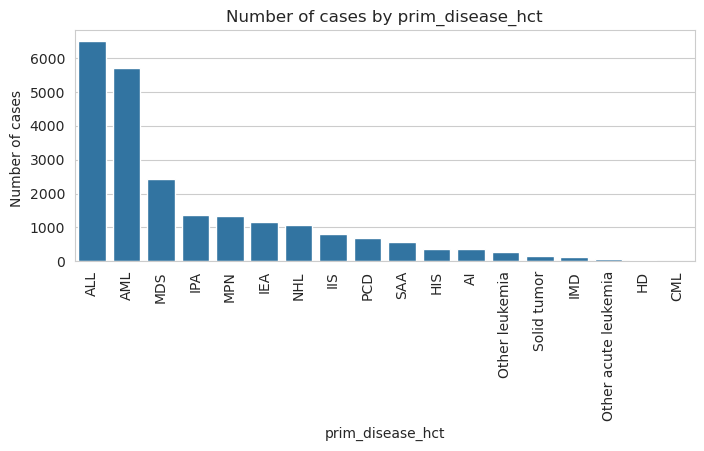

In [40]:
# Plot number of cases by value of prim_disease_hct
plot_discrete_feature('prim_disease_hct', figsize=(8, 3), tick_angle=90)

**Notes:** This is a high-cardinality feature. There are 17 values total. Of these, 12 account for less than 5% of cases each. We may wish to bin less-common values together into an "other" category. 

##### Distribution of hla_high_res_6

In [41]:
# View percentage of cases by value of hla_high_res_6
get_percentages('hla_high_res_6')

,hla_high_res_6,percent
5,0.0,0.01
4,2.0,0.20
1,3.0,19.68
3,4.0,8.97
2,5.0,11.53
0,6.0,59.62


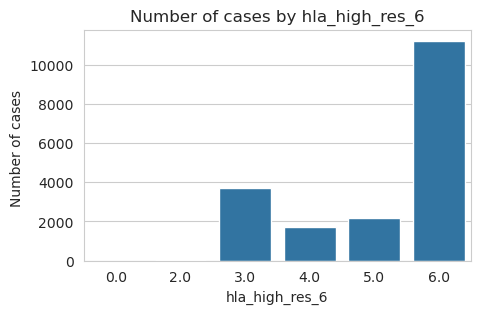

In [42]:
# Plot number of cases by value of hla_high_res_6
plot_discrete_feature('hla_high_res_6')

**Notes:** This feature encodes recipient / 1st donor allele-level (high resolution) matching at HLA-A,-B,-DRB1. This is identical to `hla_low_res_6`, except that the matching is high-resolution instead of low. The distributions of the two features are also quite similar, with a majority of values equal to 6 and virtually none less than 3. These two features are likely to be very highly correlated. However, before discarding either, we may want to examine how often a patient has non-missing data in one of the two, but not both.

##### Distribution of cmv_status

In [43]:
# View percentage of cases by value of cmv_status
get_percentages('cmv_status')

,cmv_status,percent
0,+/+,48.39
1,-/+,25.05
2,+/-,14.41
3,-/-,12.15


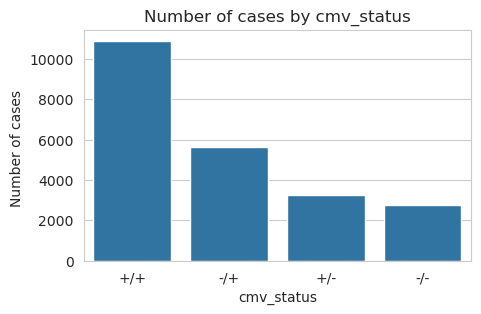

In [44]:
# Plot number of cases by value of cmv_status
plot_discrete_feature('cmv_status')

**Notes:**  This feature encodes donor/recipient CMV serostatus--that is, presence of [antibodies to CMV](https://pmc.ncbi.nlm.nih.gov/articles/PMC3512215/) in the donor's and recipient's blood. It appears that a majority of both donors are recipients are positive. However, each of the four posible combinations is represented reasonably well in the data. 

##### Distribution of hla_high_res_10

In [45]:
# View percentage of cases by value of hla_high_res_10
get_percentages('hla_high_res_10')

,hla_high_res_10,percent
7,3.0,0.01
6,4.0,0.13
1,5.0,14.73
3,6.0,6.26
5,7.0,5.53
4,8.0,5.90
2,9.0,10.88
0,10.0,56.56


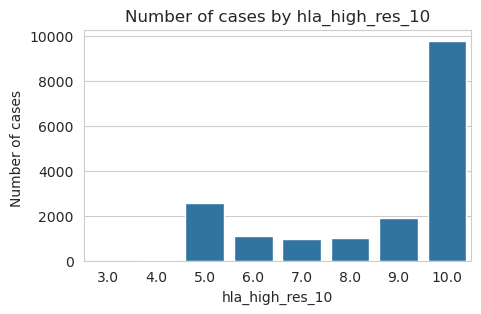

In [46]:
# Plot number of cases by value of hla_high_res_10
plot_discrete_feature('hla_high_res_10')

**Notes:** This feature encodes recipient / 1st donor allele-level (high resolution) matching at generic loci HLA-A,-B,-C,-DRB1, -DQB1. Note that this is identical to `hla_high_res_8` except for present of a new allele, `DQB1`. Since we also have a feature `hla_match_dbq1_high`, the feature may be redunant unless either `hla_high_res_8` or `hla_match_dbq1_high` are missing.

##### Distribution of hla_match_dqb1_high

In [47]:
# View percentage of cases by value of hla_match_dqb1_high
get_percentages('hla_match_dqb1_high')

,hla_match_dqb1_high,percent
2,0.0,0.34
1,1.0,25.52
0,2.0,74.13


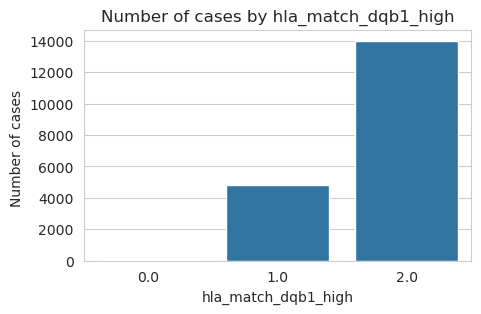

In [48]:
# Plot number of cases by value of hla_match_dqb1_high
plot_discrete_feature('hla_match_dqb1_high')

**Notes:** This feature encodes recipient / 1st donor allele level (high resolution) matching at HLA-DQB1, one of the alleles included in `hla_high_res_10`. As with other HLA match feature we've seen so a majority of cases take the maximum possible value. Virtually no cases have a value 0. These may be outliers.

##### Distribution of tce_imm_match

In [49]:
# View percentage of cases by value of tce_imm_match
get_percentages('tce_imm_match')

,tce_imm_match,percent
0,P/P,74.21
1,G/G,14.36
2,H/H,6.18
3,G/B,3.03
4,H/B,1.25
5,P/H,0.47
6,P/B,0.33
7,P/G,0.16


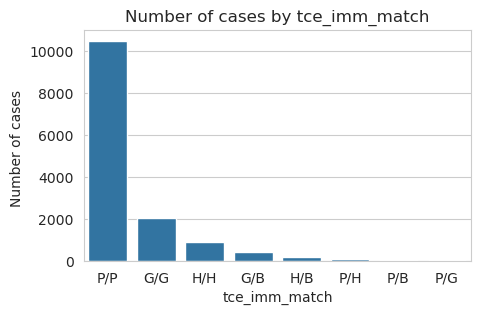

In [50]:
# Plot number of cases by value of tce_imm_match
plot_discrete_feature('tce_imm_match')

**Notes:** This feature encodes T-cell [epitope](https://en.wikipedia.org/wiki/Epitope) immunogenicity/diversity match. Epiptopes are short sequences of amino acids which are recognized by T-cells. An epiptope mismatch between donor and recipient may cause the recipient's immune system to attack the donor cells. The majority of cases in our data are matches of type P/P. Non-matching combinations between donor and recipient are rare. We may want to bin these as a `mismatched` category.

##### Distribution of hla_nmdp_6

In [51]:
# View percentage of cases by value of hla_nmdp_6
get_percentages('hla_nmdp_6')

,hla_nmdp_6,percent
4,2.0,0.15
1,3.0,19.92
3,4.0,5.13
2,5.0,13.37
0,6.0,61.43


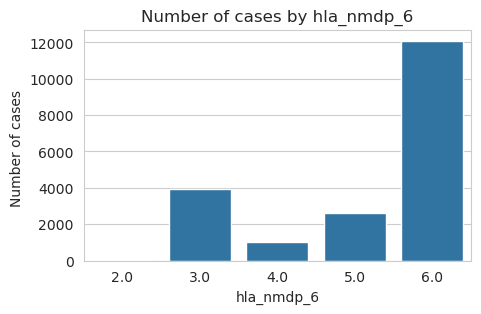

In [52]:
# Plot number of cases by value of hla_nmdp_6
plot_discrete_feature('hla_nmdp_6')

**Notes:** This feature encodes recipient / 1st donor matching at HLA-A(lo),-B(lo),-DRB1(hi). Assuming "lo" and "hi" refer to low-resolution and high-resolution matching, this should be quite similar to the feature `hla_low_res_6`. 

##### Distribution of hla_match_c_low

In [53]:
# View percentage of cases by value of hla_match_c_low
get_percentages('hla_match_c_low')

,hla_match_c_low,percent
2,0.0,0.29
1,1.0,23.72
0,2.0,75.99


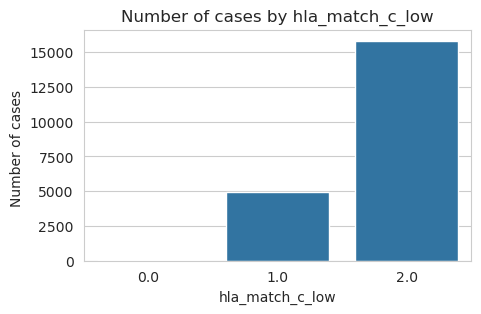

In [54]:
# Plot number of cases by value of hla_match_c_low
plot_discrete_feature('hla_match_c_low')

**Notes:** This feature encodes recipient / 1st donor antigen level (low resolution) matching at HLA-C. This is similar to `hla_match_c_high`, except that the resolution is low instead of high. The distribution of the two features is also very similar, with essentially no 0's and about 76% 2's. However, it's possible that we will have patients with non-missing data in only one of these two features.

##### Distribution of rituximab

In [55]:
# View percentage of cases by value of rituximab
get_percentages('rituximab')

,rituximab,percent
0,No,97.62
1,Yes,2.38


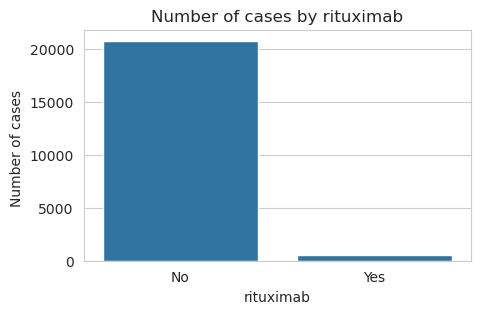

In [56]:
# Plot number of cases by value of rituximab
plot_discrete_feature('rituximab')

**Notes:** This feature records whether the medication rituximab was used prior to the hct procedure. However, the value `Yes` only occurs in about 2% of patients. This is a low-variance feature, which may not be helpful for modeling.

##### Distribution of hla_match_drb1_low

In [57]:
# View percentage of cases by value of hla_match_drb1_low
get_percentages('hla_match_drb1_low')

,hla_match_drb1_low,percent
1,1.0,28.43
0,2.0,71.57


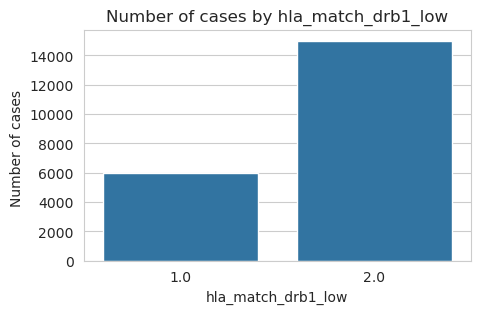

In [58]:
# Plot number of cases by value of hla_match_drb1_low
plot_discrete_feature('hla_match_drb1_low')

**Notes:** This feature encodes recipient / 1st donor antigen level (low resolution) matching at HLA-DRB1. The only two values are 1 and 2, with 2 being most common. Note that HLA-DRB1 is included in many other scores (for example `hla_low_res_6`). In addition, we expect this feature to be similar to `hla_match_drb1_high`, which tests matching of the same allele. For these reasons, this feature may be partially redundant.

##### Distribution of hla_match_dqb1_low

In [59]:
# View percentage of cases by value of hla_match_dqb1_low
get_percentages('hla_match_dqb1_low')

,hla_match_dqb1_low,percent
2,0.0,0.38
1,1.0,21.83
0,2.0,77.79


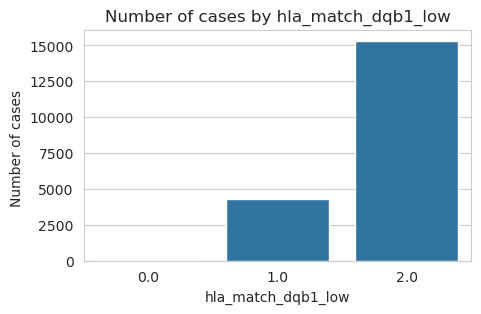

In [60]:
# Plot number of cases by value of hla_match_dqb1_low
plot_discrete_feature('hla_match_dqb1_low')

**Notes:** The feature encodes recipient / 1st donor antigen level (low resolution) matching at HLA-DQB1. Low-resolution matches on this allele contribute to `hla_low_res_10` scores. In addition, we have a feature `hla_match_dbq1_high` which encodes high-resolution matches of the same allels, and has an almost-identical distribution. Hence this feature is at least somewhat redundant. 

As with similar features, most cases take the maximum value. There are virtually no 0's, and we may want to consider such cases outliers.

##### Distribution of prod_type

In [61]:
# View percentage of cases by value of prod_type
get_percentages('prod_type')

,prod_type,percent
0,PB,70.89
1,BM,29.11


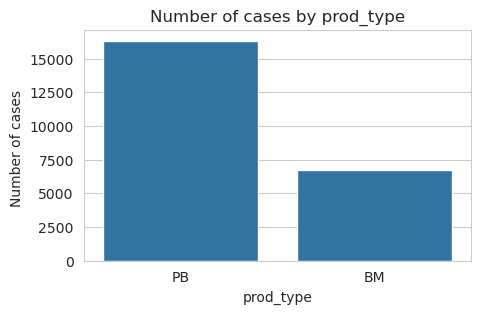

In [62]:
# Plot number of cases by value of prod_type
plot_discrete_feature('prod_type')

**Notes:** This is a categorical feature with only two values, and both values are reasonable well-represented in the data. Comparing with the feature `prod_type`, it seems likely that the categories stand for "Peripheral Blood" and "Bone Marrow." The difference between this feature and `graft_type` is not obvious.

##### Distribution of cyto_score_detail

In [63]:
# View percentage of cases by value of cyto_score_detail
get_percentages('cyto_score_detail')

,cyto_score_detail,percent
0,Intermediate,66.08
1,Poor,19.76
2,Favorable,7.27
3,TBD,6.06
4,Not tested,0.83


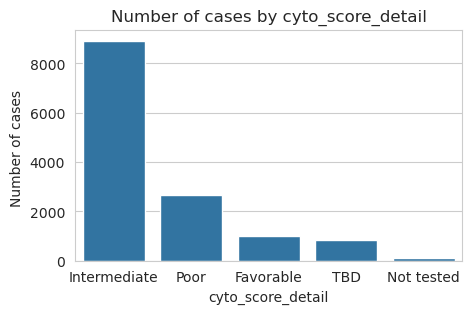

In [64]:
# Plot number of cases by value of cyto_score_detail
plot_discrete_feature('cyto_score_detail')

**Notes:** This feature is described as 'Cytogenetics for DRI (AML/MDS)'. To understand this feature, we will need to see how it interacts with `dri_score`. We may want to code the values `TBD` and `Not tested` as missing data.

##### Distribution of conditioning_intensity

In [65]:
# View percentage of cases by value of conditioning_intensity
get_percentages('conditioning_intensity')


,conditioning_intensity,percent
0,MAC,51.27
1,RIC,31.94
2,NMA,14.60
3,TBD,1.56
4,No drugs reported,0.36
5,"N/A, F(pre-TED) not submitted",0.26


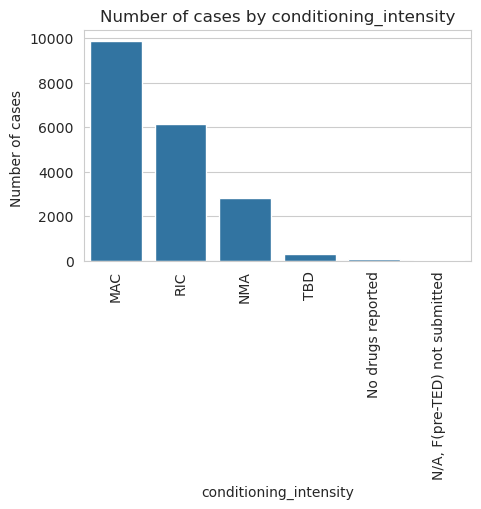

In [66]:
# Plot number of cases by value of conditioning_intensity
plot_discrete_feature('conditioning_intensity', tick_angle=90)

**Notes:** This feature encodes the type of chemotherapy given prior to the hct procedure. We may wish to code the value `TBD` as missing data. There are two very rare values indicating no drugs. Since this is such a rare condition, we may want to drop these rows, or at least examine them more closely.

##### Distribution of ethnicity

In [67]:
# View percentage of cases by value of ethnicity
get_percentages('ethnicity')

,ethnicity,percent
0,Not Hispanic or Latino,86.78
1,Hispanic or Latino,11.82
2,Non-resident of the U.S.,1.40


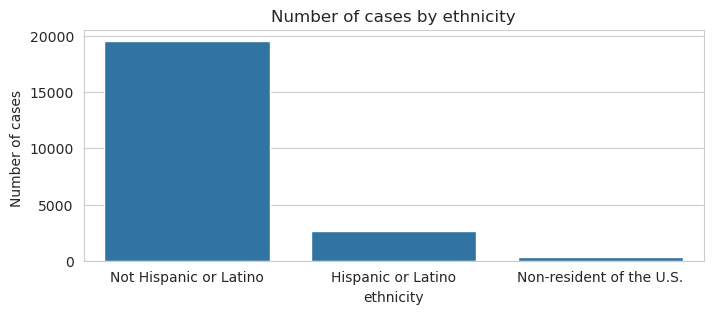

In [68]:
# Plot number of cases by value of ethnicity
plot_discrete_feature('ethnicity', figsize=(8, 3))

**Notes:** This feature encodes whether a US-based patient is of Hispanic/Latino ancestry. While a majority of cases are non-hispanic, there is a non-negligible number of hispanic patients. `Non-resident of the U.S.` is a separate category, presumably because other countries do not track Hispanic/Latino ancestry as a separate category. We may want to code this as missing data.

##### Distribution of year_hct

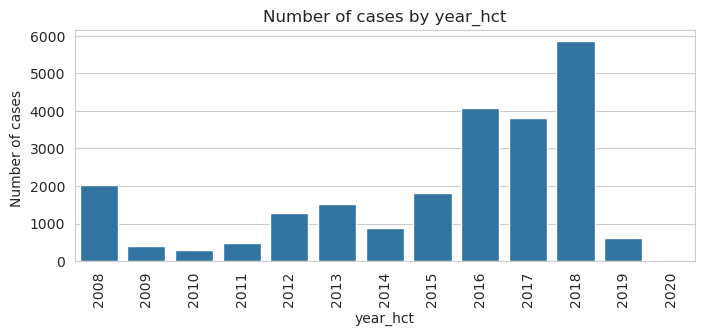

In [69]:
# Plot number of cases by value of year_hct
plot_discrete_feature('year_hct', figsize=(8, 3), tick_angle=90)

**Notes:** The cases in this dataset span just over a decade, from 2008 to 2020. The number of transplants peaks 2016-2018, and then drops off sharply in 2019. We note that using year as a feature in our predictive model would probably not make sense. However, it may be interesting to look for changes in survival time by year. If some years are very different from others, we may need to account for that in our analysis. For example, we may wish to discard the few values from 2020, since COVID-19 would potentially create very unusual conditions.

##### Distribution of obesity

In [70]:
# View percentage of cases by value of obesity
get_percentages('obesity')

,obesity,percent
0,No,92.99
1,Yes,6.56
2,Not done,0.45


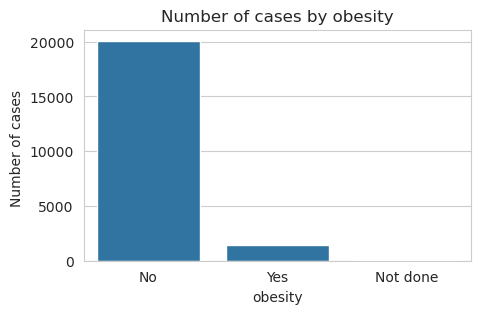

In [71]:
# Plot number of cases by value of obesity
plot_discrete_feature('obesity')

**Notes:** Fewer then 7% of cases with the feature `obesity` are coded as `Yes`. This is surprising at first, since obesity is a common condition in the U.S. One possible explanation is that leukemia itself causes weight loss. Since this feature is low variance, it may be of limited value to our model. As with other features, we may wish to code 'Not done' as missing data.

##### Distribution of mrd_hct

In [72]:
# View percentage of cases by value of mrd_hct
get_percentages('mrd_hct')

,mrd_hct,percent
0,Negative,65.88
1,Positive,34.12


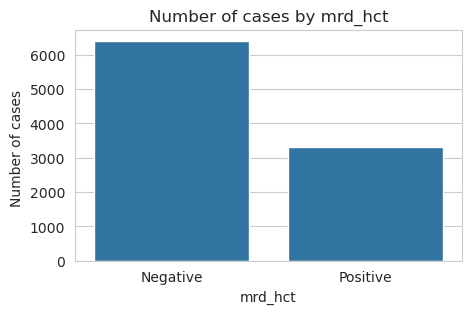

In [73]:
# Plot number of cases by value of mrd_hct
plot_discrete_feature('mrd_hct')

**Notes:** This feature encode the presence of [minimal residual disease](https://www.mdanderson.org/cancerwise/what-is-minimal-residual-disease--mrd--multiple-myeloma-lymphoma-leukemia-patients.h00-159383523.html) (MRD) in patients with AML or ALL. MRD occurs when a very small number of cancer cells remain in the body, even after successful treatment. These cells can be detected with certain assays, even if they do not apear in a typical biopsy. A majority of cases are negative, but there are a reasonable number of positive cases in the data as well.

##### Distribution of in_vivo_tcd

In [74]:
# View percentage of cases by value of in_vivo_tcd
get_percentages('in_vivo_tcd')


,in_vivo_tcd,percent
0,No,61.6
1,Yes,38.4


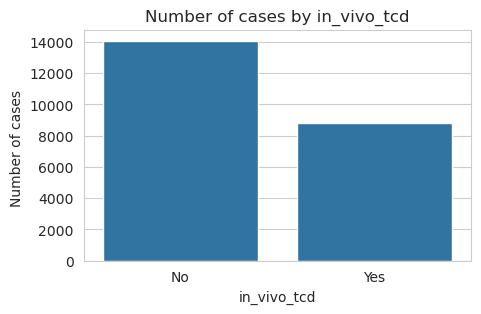

In [75]:
# Plot number of cases by value of in_vivo_tcd
plot_discrete_feature('in_vivo_tcd')

**Notes:** This feature encodes whether an in_vivo [t-cell depletion ](https://jhoonline.biomedcentral.com/articles/10.1186/s13045-018-0668-3) was performed using ATG/alemtuzumab. In-vivo t-cell depletion is a procedure that helps prevent graft vs. host disease. For this feature, there is a reasonable number of not `Yes` and `No` values in the dataset.

##### Distribution of tce_match

In [76]:
# View percentage of cases by value of tce_match
get_percentages('tce_match')

,tce_match,percent
0,Permissive,64.12
1,GvH non-permissive,16.71
2,Fully matched,10.58
3,HvG non-permissive,8.59


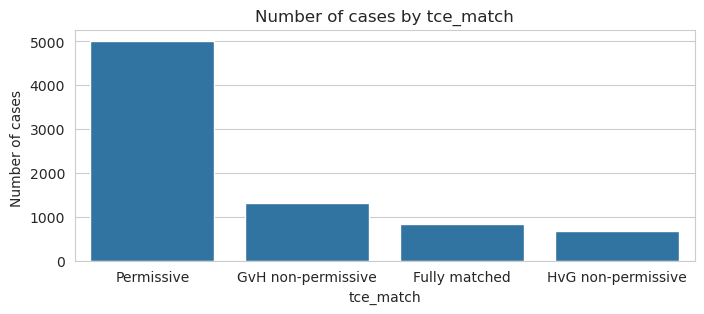

In [77]:
# Plot number of cases by value of tce_match
plot_discrete_feature('tce_match', figsize=(8, 3))

**Notes:** This feature encodes whether the [t-cell epiptote matching](https://pmc.ncbi.nlm.nih.gov/articles/PMC3813000/) between donor and patient is an exact match, a low-risk mismatch (permissive), or a higher-risk mismatch. The most common value is `Permissive`. This feature also has a large number of missing values. It's possible that tce_match is only considered when there is a possible mismatch in certain HLA alleles. Note that overall, there are only about 2500 non-permissive matches, a very small fraction of the overall data.


##### Distribution of hla_match_a_high

In [78]:
# View percentage of cases by value of hla_match_a_high
get_percentages('hla_match_a_high')

,hla_match_a_high,percent
2,0.0,0.26
1,1.0,29.27
0,2.0,70.47


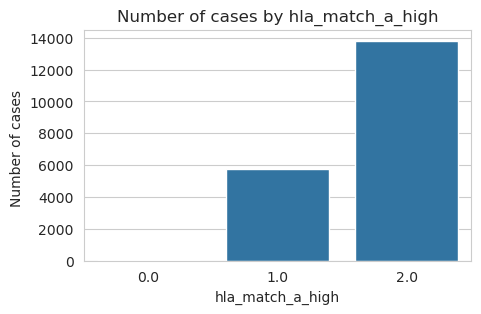

In [79]:
# Plot number of cases by value of hla_match_a_high
plot_discrete_feature('hla_match_a_high')

**Notes:** The feature encodes Recipient / 1st donor allele level (high resolution) matching at HLA-A. As with other features based on HLA allele matches, there are concerns with redundancy. The feature `hla_match_a_low` encodes matching on the same allele, and there are several features which include total matches over a set of alleles including A. As with other features based on HLA alleles, a majority of values are equal to the maximum. There are virtually no 0's.

##### Distribution of hepatic_severe

In [80]:
# View percentage of cases by value of hepatic_servere
get_percentages('hepatic_severe')

,hepatic_severe,percent
0,No,93.69
1,Yes,5.51
2,Not done,0.80


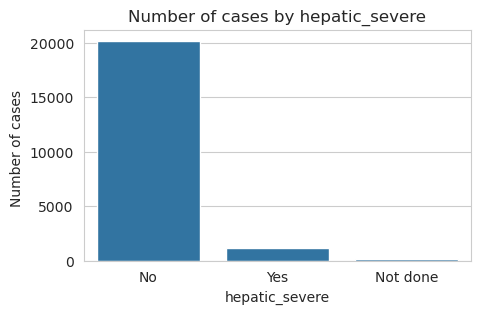

In [81]:
# Plot number of cases by value of hepatic_servere
plot_discrete_feature('hepatic_severe')

**Notes:** This feature encodes the presence of moderate to severe liver issues. The value `Yes` appears in less than 6% of cases. We may consider dropping this feature of combining with other health indicators. The value `Not done` may be coded as missing data.

##### Distribution of donor_age

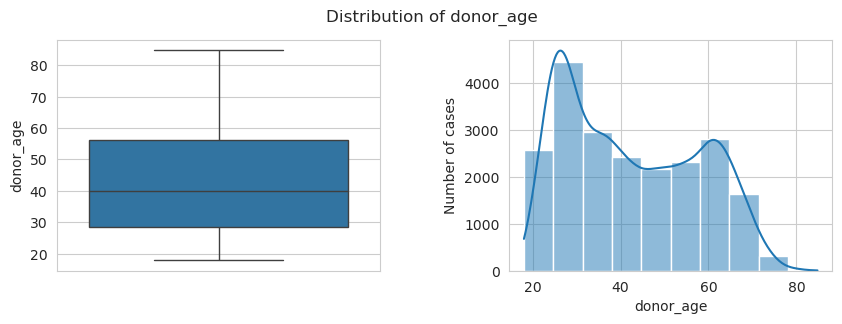

In [82]:
# Plot distribution of values for prior_tumor
plot_numeric_feature('donor_age')

**Notes:** The distribution of donor_age has a minimum of approximately 18. It is likely not permitted for younger people to donate. The distribution has a peak around 30, and then is relatively flat through the mid-60's before sharply dropping off. The box plot does not show any outliers, but the presence of a donor over 80 years old is remarkable.

##### Distribution of prior_tumor

In [83]:
# View percentage of cases by value of prior_tumor
get_percentages('prior_tumor')

,prior_tumor,percent
0,No,87.86
1,Yes,11.09
2,Not done,1.05


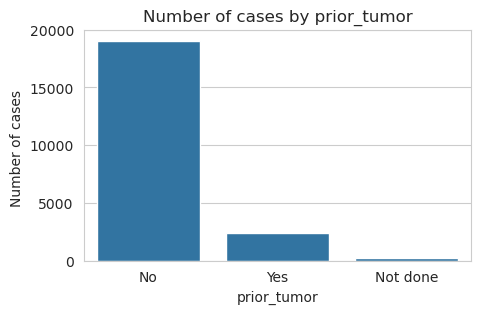

In [84]:
# Plot number of cases by value of prior_tumor
plot_discrete_feature('prior_tumor')

**Notes:** The feature encodes whether the patient had a prior solid tumor. The `Yes` values account for just over 11% of cases, making this feature somewhat low variance. We may want to encode the `Not done` category as missing data.

##### Distribution of hla_match_b_low

In [85]:
# View percentage of cases by value of hla_match_b_low
get_percentages('hla_match_b_low')

,hla_match_b_low,percent
2,0.0,0.25
1,1.0,27.63
0,2.0,72.12


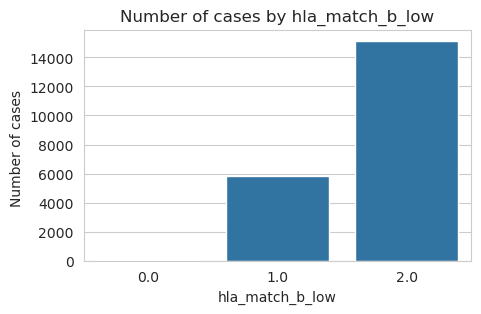

In [86]:
# Plot number of cases by value of hla_match_b_low
plot_discrete_feature('hla_match_b_low')

**Notes:** This feature encodes recipient / 1st donor antigen level (low resolution) matching at HLA-B. As with other features that encode matching on a specific HLA-allele, this feature may be somewhat redundant. We have other features that give overall matching on a set of alleles that include HLA-B. In addition, we have a feature `hla_match_b_high` which gives high-resolution match on the same allele. 

As with other features that encode HLA-allele matches, a majority take the maximum value. There are virtually no 0's.

##### Distribution of peptic_ulcer

In [87]:
# View percentage of cases by value of peptic_ulcer
get_percentages('peptic_ulcer')

,peptic_ulcer,percent
0,No,98.34
1,Yes,0.99
2,Not done,0.67


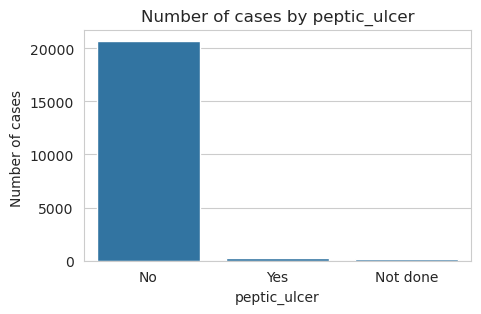

In [88]:
# Plot number of cases by value of peptic_ulcer
plot_discrete_feature('peptic_ulcer')

**Notes:** This feature records the presence or absense of peptic ulcers. Since `Yes` values account for less than 1% of cases, this feature may not have much predictive power. We may consider dropping it, or combining with other health indicators. We may also want to code the value of `Not done` as missing data.

##### Distribution of age_at_hct

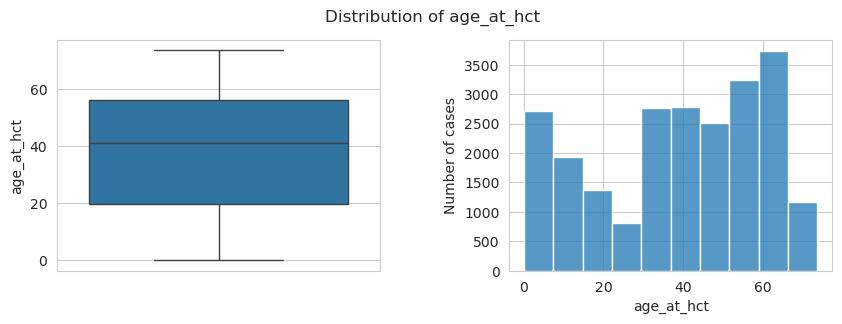

In [89]:
#Plot distribution of values for  Age at HCT
plot_numeric_feature('age_at_hct', kde=False)

**Notes:** Age at HCT has a bimodal distribution, with one peak near zero for pediatric cases, and a much flatter peak from roughly ages 30-65 representing adults. The distribution does not seem to have outliers per se, but it seems to drop off sharply in the mid-late 60's.`

##### Distribution of hla_match_a_low

In [90]:
# View percentage of cases by value of hla_match_a_low
get_percentages('hla_match_a_low')

,hla_match_a_low,percent
2,0.0,0.19
1,1.0,28.74
0,2.0,71.07


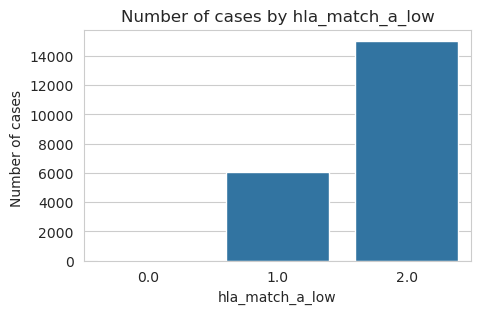

In [91]:
# Plot number of cases by value of [hla_match_a_low]
plot_discrete_feature('hla_match_a_low')

**Notes:** The feature encodes Recipient / 1st donor allele level (low resolution) matching at HLA-A. As with other features based on HLA allele matches, there are concerns with redundancy. The feature `hla_match_a_high` encodes matching on the same allele, and has a very similar distribution of values. In addition, there are several features which include total matches over a seq of alleles including A. As with other features based on HLA alleles, a majority of values are equal to the maximum. There are virtually no 0's.

##### Distribution of gvhd_proph

In [92]:
# View percentage of cases by value of gvhd_proph
get_percentages('gvhd_proph')

,gvhd_proph,percent
0,FK+ MMF +- others,36.57
1,Cyclophosphamide alone,18.47
2,FK+ MTX +- others(not MMF),14.82
3,Cyclophosphamide +- others,8.34
4,CSA + MMF +- others(not FK),7.96
5,FKalone,4.37
6,TDEPLETION alone,1.95
7,Other GVHD Prophylaxis,1.93
8,TDEPLETION +- other,1.88
9,No GvHD Prophylaxis,0.86


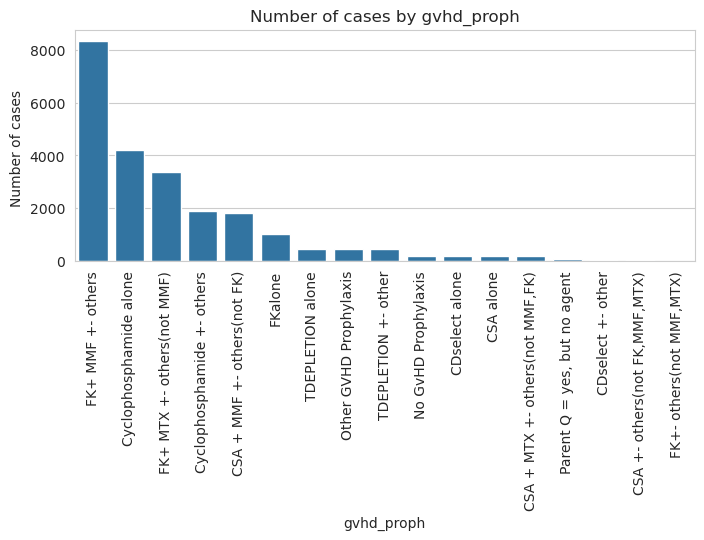

In [93]:
# Plot number of cases by value of gvhd_proph
plot_discrete_feature('gvhd_proph', figsize=(8,3), tick_angle=90)


**Notes:** This feature encodes the treatments used for prevent graphs-vs-host disease. This is a high-cardinality feature, with 12 levels that each individually account for less than 5% of cases. We may wish to bin these less-common levels into an "other" category.

##### Distribution of rheum_issue

In [94]:
# View percentage of cases by value of rheum_issue
get_percentages('rheum_issue')

,rheum_issue,percent
0,No,97.58
1,Yes,1.83
2,Not done,0.59


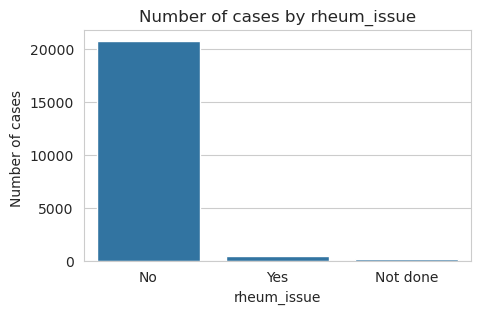

In [95]:
# Plot number of cases by value of rheum_issue
plot_discrete_feature('rheum_issue')

**Notes:** This feature encodes the presence or absence of a rheumatologic issue. However, the value is `Yes` for less than 2% of cases. We may want to drop this feature or combine it with other health indicators in some way.

##### Distribution of sex_match

In [96]:
# View percentage of cases by value of sex_match
get_percentages('sex_match')

,sex_match,percent
0,M-M,28.03
1,F-M,27.29
2,M-F,23.50
3,F-F,21.18


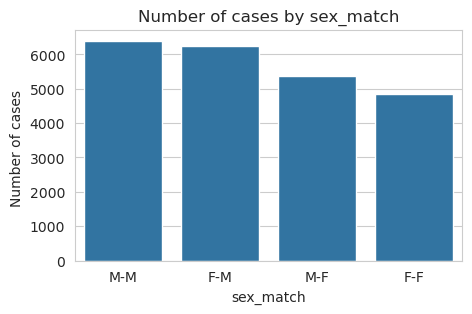

In [97]:
# Plot number of cases by value of sex_match
plot_discrete_feature('sex_match')


**Notes:** This feature encodes donor/recipient sex match. Insterestingly, it appears that there are more more male recipients than female overall. The data does not seem to show a strong preference for sex match between donor and recipient.

##### Distribution of hla_match_b_high

In [98]:
# View percentage of cases by value of hla_match_b_high
get_percentages('hla_match_b_high')

,hla_match_b_high,percent
2,0.0,0.31
1,1.0,29.54
0,2.0,70.15


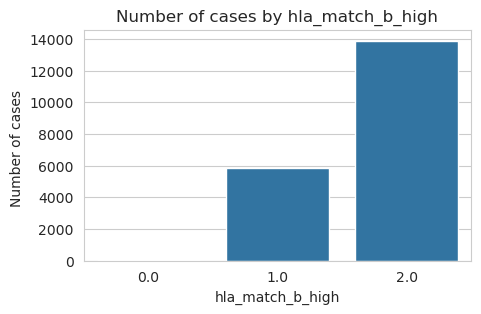

In [99]:
# Plot number of cases by value of hla_match_b_high
plot_discrete_feature('hla_match_b_high')

**Notes:** This feature encodes recipient / 1st donor antigen level (high resolution) matching at HLA-B. As with other features that encode matching on a specific HLA alleles, this feature may be somewhat redundant. We have other features that give overall matching on a set of alleles that include HLA-B. In addition, we have a feature `hla_match_b_low` which gives low-resolution match on the same allele, and has a very similar distribution to `hla_match_b_high`.

As with other features that encode HLA-allele matches, a majority take the maximum value. There are virtually no 0's.

##### Distribution of race_group

In [100]:
# View percentage of cases by value of race_group
get_percentages('race_group')

,race_group,percent
0,White,16.95
1,More than one race,16.83
2,Asian,16.78
3,American Indian or Alaska Native,16.61
4,Black or African-American,16.58
5,Native Hawaiian or other Pacific Islander,16.25


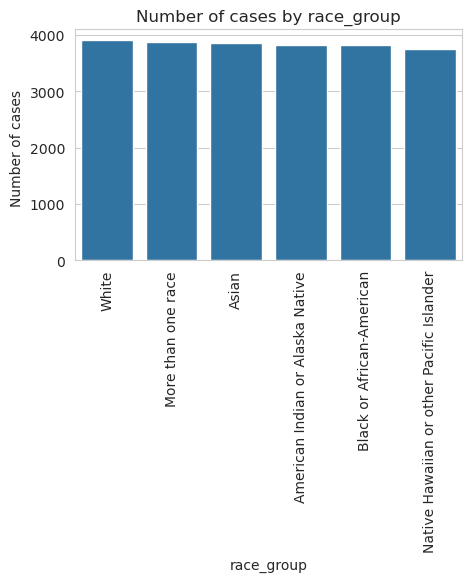

In [101]:
# Plot number of cases by value of race_group
plot_discrete_feature('race_group', tick_angle=90)

**Notes:** The distribution of racial groups in the data is surprisingly well-balanced. Given that one of the goal of the project is to improve equity across demographic groups, it seems reasonable to suppose that the data was deliberately stratified by race.

##### Distribution of comorbidity_score

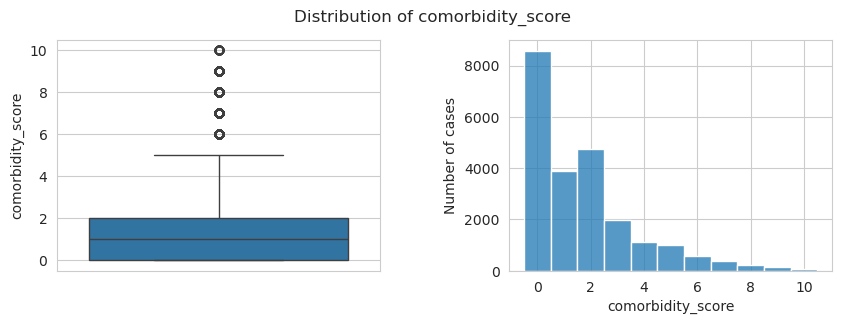

In [102]:
plot_numeric_feature('comorbidity_score', kde=False, discrete=True)

**Notes:** This feature encodes Sorror comorbidity score, which takes integer values from 0 to 10. This is a right-skewed distribution, with vallues clustered near 0 and a median of 1. While box plots may not be the most appropriate for a discrete variable with relatively few values, it is interesting to note that a box plot flags any score of 6 or more as an outlier.

##### Distribution of karnofsky_score

In [103]:
# View percentage of cases by value of karnofsky_score
get_percentages('karnofsky_score')

,karnofsky_score,percent
6,40.0,0.04
5,50.0,0.29
4,60.0,4.55
1,70.0,24.03
3,80.0,7.19
0,90.0,55.03
2,100.0,8.88


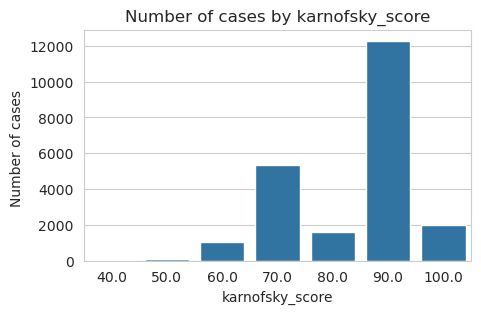

In [104]:
# Plot distribution of values for karnofsky_score
plot_discrete_feature('karnofsky_score')

**Notes:** The feature encodes the [karnofsky performance scale](https://www.npcrc.org/files/news/karnofsky_performance_scale.pdf), indicating how much a disease interferes with daily life. The most common score is 90, indicating normal functioning and minimal symptoms. A second peak a 70 corresponds to a person able to care for themselves, but not participate in normal activities such as work.

##### Distribution of hepatic_mild

In [105]:
# View percentage of cases by value of hepatic_mild
get_percentages('hepatic_mild')

,hepatic_mild,percent
0,No,93.09
1,Yes,6.40
2,Not done,0.51


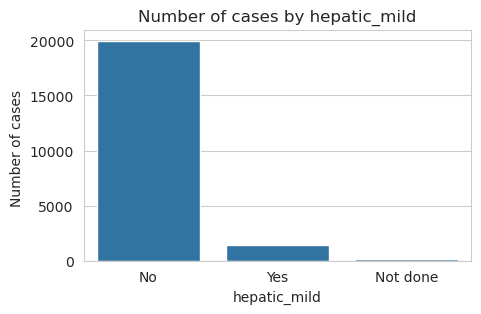

In [106]:
# Plot number of cases by value of hepatic_mild
plot_discrete_feature('hepatic_mild')

**Notes:** This feature encodes the presence of mild hepatic (liver) issues. The `Yes` value corresponds to only 6.4% of cases, which makes this a relatively low-variance feature. We may want to combine this feature with other health indicators, or drop it entirely. As with other features, we may want to encode the value `Not done` as missing data.

##### Distribution of tce_div_match

In [107]:
# View percentage of cases by value of tce_div_match
get_percentages('tce_div_match')

,tce_div_match,percent
0,Permissive mismatched,74.36
1,GvH non-permissive,14.23
2,HvG non-permissive,8.03
3,Bi-directional non-permissive,3.38


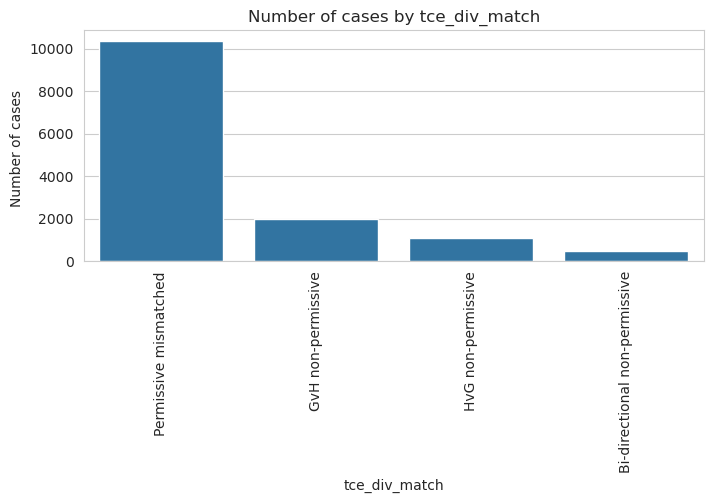

In [108]:
# Plot number of cases by value of tce_div_match
plot_discrete_feature('tce_div_match', figsize=(8, 3), tick_angle=90)

**Notes:** Similar to `tce_match`, tce_div_match seems to encode whether the [t-cell epiptote matching](https://pmc.ncbi.nlm.nih.gov/articles/PMC3813000/) between donor and patient is a low-risk mismatch (permissive), or a higher-risk mismatch. The most common value is `Permissive`. The difference between this feature and `tce_match` is not immediately clear from the data dictionary. Like `tce_match`, this feature also has a large number of missing values. It's possible that `tce_div_match` is only considered when there is a possible mismatch in certain HLA alleles. 

##### Distribution of donor_related

In [109]:
# View percentage of cases by value of donor_related
get_percentages('donor_related')

,donor_related,percent
0,Related,56.46
1,Unrelated,42.28
2,Multiple donor (non-UCB),1.26


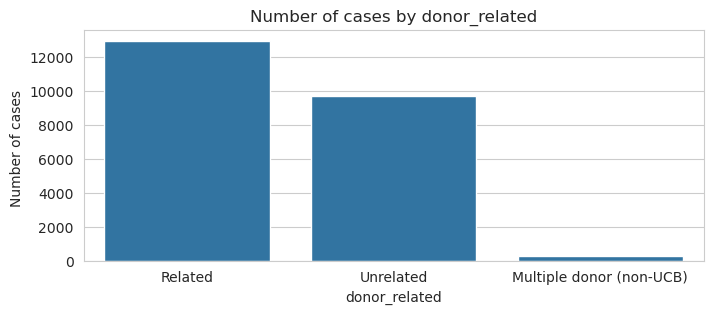

In [110]:
# Plot number of cases by value of donor_related
plot_discrete_feature('donor_related', figsize=(8, 3))

**Notes:** The dataset has a reasonable balance between related and unrelated donors. The `Multiple donor (non-UCB)` category is rare. We may want to drop those records, or combine that category with one of the two main ones.

##### Distribution of melphalan_dose

In [111]:
# View percentage of cases by value of melphalan_dose
get_percentages('melphalan_dose')

,melphalan_dose,percent
0,"N/A, Mel not given",73.52
1,MEL,26.48


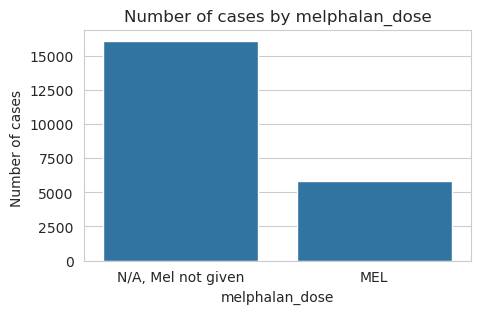

In [112]:
# Plot number of cases by value of melphalan_dose
plot_discrete_feature('melphalan_dose')

**Notes:** The feature records whether melphalan was given as a treatment prior to hct. This feature has no rare levels.

##### Distribution of hla_low_res_8

In [113]:
# View percentage of cases by value of hla_low_res_8
get_percentages('hla_low_res_8')

,hla_low_res_8,percent
6,2.0,0.00
5,3.0,0.08
1,4.0,17.03
3,5.0,6.39
4,6.0,5.82
2,7.0,10.35
0,8.0,60.32


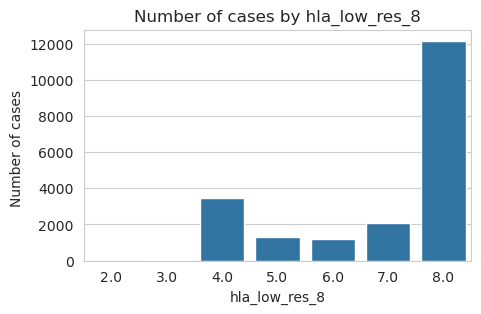

In [114]:
# Plot number of cases by value of hla_low_res_8
plot_discrete_feature('hla_low_res_8')

**Notes:** This feature represents recipient / 1st donor allele-level (low) resolution) matching at multiple genetic loci: HLA-A, HLA-B, HLA-C and HLR-DRB1. This feature is very similar to `hla_high_res_8`, which encodes high-resolution matching at the same alleles. 

##### Distribution of cardiac

In [115]:
# View percentage of cases by value of cardiac
get_percentages('cardiac')

,cardiac,percent
0,No,93.66
1,Yes,5.82
2,Not done,0.52


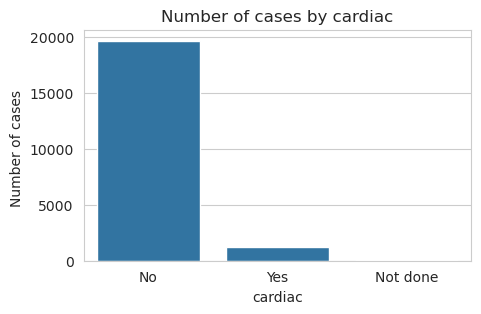

In [116]:
# Plot number of cases by value of cardiac
plot_discrete_feature('cardiac')

**Notes:** As with many health indicator features, this has relatively few `Yes` values. We may drop this feature, or combine it with other health indicators. We may want to encode 'Not done' as missing data.

##### Distribution of hla_match_drb1_high

In [117]:
# View percentage of cases by value of hla_match_drb1_high
get_percentages('hla_match_drb1_high')

,hla_match_drb1_high,percent
2,0.0,0.26
1,1.0,28.75
0,2.0,70.99


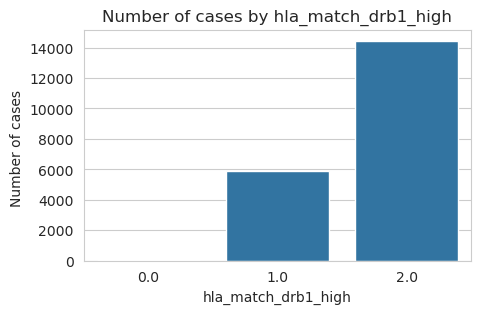

In [118]:
# Plot number of cases by value of hla_match_drb1_high
plot_discrete_feature('hla_match_drb1_high')

**Notes:** This feature encodes recipient / 1st donor antigen level (high resolution) matching at HLA-DRB1. The values are 0, 1 and 2, but the number of zeros is very small. Note that HLA-DRB1 is included in many other scores (for example `hla_high_res_6`). In addition, this feature is very similar to `hla_match_drb1_low`, which tests matching of the same allele. For these reasons, this feature may be redundant.

##### Distribution of pulm_moderate

In [119]:
# View percentage of cases by value of pulm_moderate
get_percentages('pulm_moderate')

,pulm_moderate,percent
0,No,79.9
1,Yes,19.5
2,Not done,0.6


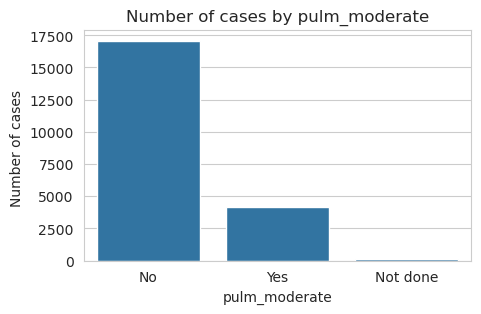

In [120]:
# Plot number of cases by value of pulm_moderate
plot_discrete_feature('pulm_moderate')

**Notes:** This feature encodes whether a patient had moderate pulmonary issues. Unlike many other health indicators, this has a fair number of `Yes` values--almost 20%. This feature likely has enough variance to help our model, either alone or in combination with other health indicators. We may want to code `Not done` as missing data.

##### Distribution of hla_low_res_10

In [121]:
# View percentage of cases by value of hla_low_res_10
get_percentages('hla_low_res_10')

,hla_low_res_10,percent
6,4.0,0.13
1,5.0,13.62
3,6.0,6.95
5,7.0,4.89
4,8.0,5.86
2,9.0,10.64
0,10.0,57.92


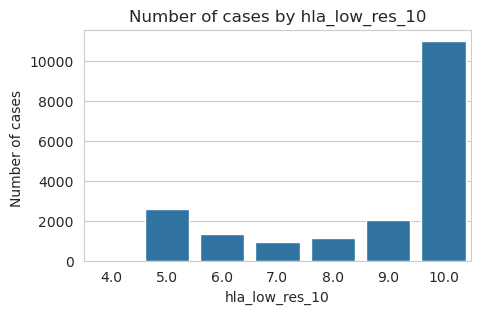

In [122]:
# Plot number of cases by value of hla_low_res_10
plot_discrete_feature('hla_low_res_10')

**Notes:** This feature encodes recipient / 1st donor allele-level (low resolution) matching at generic loci HLA-A,-B,-C,-DRB1, -DQB1. This is identical to `hla_high_res_10` except for the use of low-resolution matching. In addition, we have feature for each the individual loci included in this group. Hence this feature may be somewhat redundant. The most common value is 10, and values below 5.0 are so rare that we might consider them outliers.

##### Distribution of efs

In [123]:
# View percentage of cases by value of efs
get_percentages('efs')

,efs,percent
0,Event,53.94
1,Censored,46.06


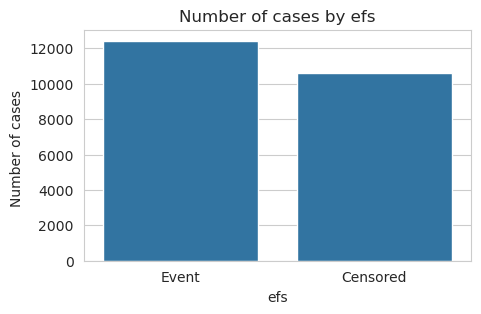

In [124]:

# Plot number of cases by value of efs
plot_discrete_feature('efs')

**Notes:** `efs` is one of two features which jointly encode our target: event-free survival. Just over half of cases are coded as `Event`, indicating that the patient either died or experienced treatment failure during the study period. 

##### Distribution of efs_time

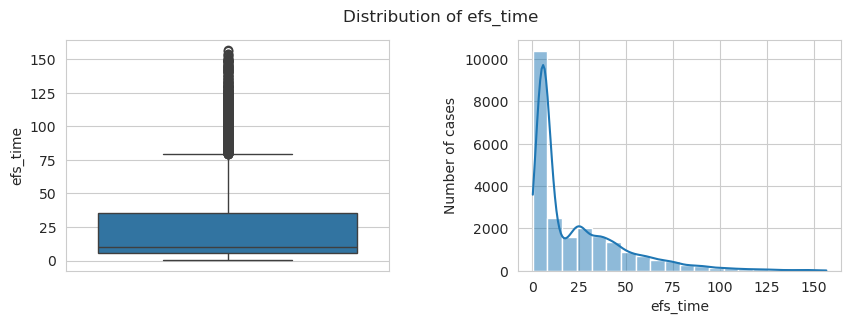

In [125]:
# Plot distribution of values for efs_time
plot_numeric_feature('efs_time', bins=20)

**Notes:** The distribution of `efs_time` is skewed right, with a sharp peak at less than 12 months and long tail with values over 12 years. According to the boxplot, the distribution has a number of outliers. 

##### Breaking down `efs_time` by `efs`

While bivariate analysis is a task for another notebook, `efs` and `efs_time` can be viewed as jointly encoding event-free survival.

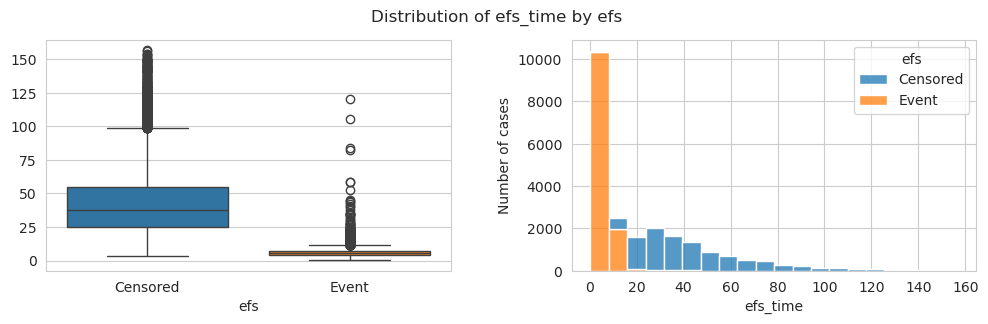

In [126]:
plot_efs_vs_efs_time(bins=20)

**Notes:** We see that survival times are generally much larger for cases coded as `Censored` versus cases coded as `Event`. In fact, there is very little overlap between the survival times for `Censored` vs `Event` cases. This suggests that the impact of censoring may not be too bad; while censoring may cause us to underestimate survival times, a majority of recorded events happen before many cases are censored. 

#### Main Take-aways

While this analysis is still very preliminary, we have a few takeaways for feature selection.
- Very few of our features are continuous numerical variables. Most numeric columns are counts or scores, which take discrete values in a defined range. We should take care to select modeling techniques that are appropriate for discrete ordinal features. (For example, Pearson correlation may not be appropriate.)
- Features which define matching on various HLA alleles come in pairs: high relution and low resolution. (These appear as column names containing "high" and "low" respectively.) Tentatively, I would suggest only keeping the "high" versions of these features, which represent more precise testing. However, I would like to verify that "high" and "low" values are both present in most cases first.
- We have several features which encode matching on groups of alleles e.g. `hla_high_res_10` combines matching results for 5 different genetic loci. Since we also have features for the individual loci, these may be considered redundant. We may or may not want to use these, depending on modeling considerations, and on how each group or individual allele correlates with survival time.
- Many features have categories which occur rarely, in 5% or less of the population. We may want to bin these categories together. The value `Not done` appears in many features, generally for a small number of cases. We may wish to code this as missing data.
- Many features indicate the presence of a particular health condition (e.g. `peptic_ulcer`). For most of these, fewer than 5% of cases are coded `Yes`. We may want to drop these features, or combine them into a single flag for uncommon health issues.
- The `comorbidity_score` feature has outliers. We might think of low values of the various HLA allele match features as outliers: typically there are very few cases at the lowest values of these features.